<a href="https://colab.research.google.com/github/Imane0021/python_project/blob/main/Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 2. Load the Dataset
df = pd.read_csv('student_performance.csv')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
# 3. Rename Columns
df.rename(columns={
    'math score': 'Math',
    'reading score': 'Reading',
    'writing score': 'Writing',
    'race/ethnicity': 'Ethnicity',
    'parental level of education': 'Parental_Edu',
    'test preparation course': 'Prep_Course'
}, inplace=True)

df.columns

Index(['gender', 'Ethnicity', 'Parental_Edu', 'lunch', 'Prep_Course', 'Math',
       'Reading', 'Writing'],
      dtype='object')

In [ ]:
# 4. Check for Missing Values
df.isnull().sum()

,0
gender,0
Ethnicity,0
Parental_Edu,0
lunch,0
Prep_Course,0
Math,0
Reading,0
Writing,0


In [ ]:
# 5. Handle Missing Values
print("Missing Values After Handling:")
print(df.isnull().sum())

Missing Values After Handling:
gender          0
Ethnicity       0
Parental_Edu    0
lunch           0
Prep_Course     0
Math            0
Reading         0
Writing         0
dtype: int64


In [ ]:
# 6. Convert Data Types
categorical_cols = ['gender', 'Ethnicity', 'Parental_Edu', 'lunch', 'Prep_Course']
for col in categorical_cols:
    df[col] = df[col].astype('category')

df.dtypes

,0
gender,category
Ethnicity,category
Parental_Edu,category
lunch,category
Prep_Course,category
Math,int64
Reading,int64
Writing,int64


In [ ]:
# 7. Remove Duplicates
print("Duplicates before:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicates after:", df.duplicated().sum())

Duplicates before: 0
Duplicates after: 0


In [ ]:
# 8.Quick Checks
print("Number of Students:", len(df))

print("Number of Students by Gender:")
print(df['gender'].value_counts())

print("Number of Students by Ethnicity:")
print(df['Ethnicity'].value_counts())

print("Number of Students by Parental Education:")
print(df['Parental_Edu'].value_counts())

print("Number of Students by Lunch:")
print(df['lunch'].value_counts())

print("Number of Students by Test Preparation Course:")
print(df['Prep_Course'].value_counts())
print()

Number of Students: 1000
Number of Students by Gender:
gender
female    518
male      482
Name: count, dtype: int64
Number of Students by Ethnicity:
Ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
Number of Students by Parental Education:
Parental_Edu
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
Number of Students by Lunch:
lunch
standard        645
free/reduced    355
Name: count, dtype: int64
Number of Students by Test Preparation Course:
Prep_Course
none         642
completed    358
Name: count, dtype: int64



In [ ]:
data = pd.read_csv('student_performance.csv')

In [ ]:
# Display the first few rows
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,female,group B,associate's degree,standard,none,71,83,78
4,female,group B,some college,standard,completed,88,95,92


In [ ]:
#demographic features (gender, race/ethnicity, parental education, lunch type, test prep course)
#three performance variables: math score, reading score, and writing score

In [ ]:
def show_average(column):
   def show_average(column):
    print(f"\nAverage math score for each group in {column}:")
    avg = data.groupby(column)["math score"].mean()
    print(avg)
    print("-" * 40)
    return avg

In [ ]:
show_average("gender")

In [ ]:
def best_group(column):
    avg = data.groupby(column)["math score"].mean()
    top = avg.idxmax()
    score = avg.max()
    print(f"The best group in {column} is '{top}' with an average score of {score:.2f}")
    print("-" * 40)
    return top, score

In [ ]:
best_group("race/ethnicity")

The best group in race/ethnicity is 'group E' with an average score of 73.82
----------------------------------------


('group E', 73.82142857142857)

In [ ]:
def summary():
    print("\n--- SUMMARY ---")
    print("Students who did the test prep course got better scores.")
    print("Having parents with higher education helps in math.")
    print("Standard lunch students got higher scores than free/reduced lunch students.")
    print("Gender and race differences exist but are not very big.")
    print("-" * 40)


In [ ]:
best_group("lunch")

The best group in lunch is 'standard' with an average score of 70.03
----------------------------------------


('standard', 70.03410852713178)

In [ ]:
summary()



--- SUMMARY ---
Students who did the test prep course got better scores.
Having parents with higher education helps in math.
Standard lunch students got higher scores than free/reduced lunch students.
Gender and race differences exist but are not very big.
----------------------------------------


In [ ]:
def show_examples_loc_iloc():
    print("\nExamples of loc and iloc usage:")

    # Using .loc to get all rows where gender is female
    girls = data.loc[data["gender"] == "female"]
    print(f"There are {len(girls)} female students.")

    # Using .iloc to get the first 3 rows and first 3 columns
    print("\nFirst 3 rows and first 3 columns using iloc:")
    print(data.iloc[:3, :3])

    # Using loc to see one specific student info
    print("\nDetails of the first student using loc:")
    print(data.loc[0])  # 0 = first row
    print("-" * 40)


In [ ]:
show_examples_loc_iloc()


Examples of loc and iloc usage:
There are 518 female students.

First 3 rows and first 3 columns using iloc:
   gender race/ethnicity parental level of education
0  female        group B           bachelor's degree
1  female        group C                some college
2  female        group B             master's degree

Details of the first student using loc:
gender                                    female
race/ethnicity                           group B
parental level of education    bachelor's degree
lunch                                   standard
test preparation course                     none
math score                                    72
reading score                                 72
writing score                                 74
Name: 0, dtype: object
----------------------------------------


In [ ]:
# Ensure consistent column names (runs safely even if already renamed)
rename_map = {
    "math score": "Math",
    "reading score": "Reading",
    "writing score": "Writing",
    "race/ethnicity": "Ethnicity",
    "parental level of education": "Parental_Edu",
    "test preparation course": "Prep_Course",
}

# Load the dataset to ensure df is defined
df = pd.read_csv('student_performance.csv')

df = df.rename(columns={k:v for k,v in rename_map.items() if k in df.columns})

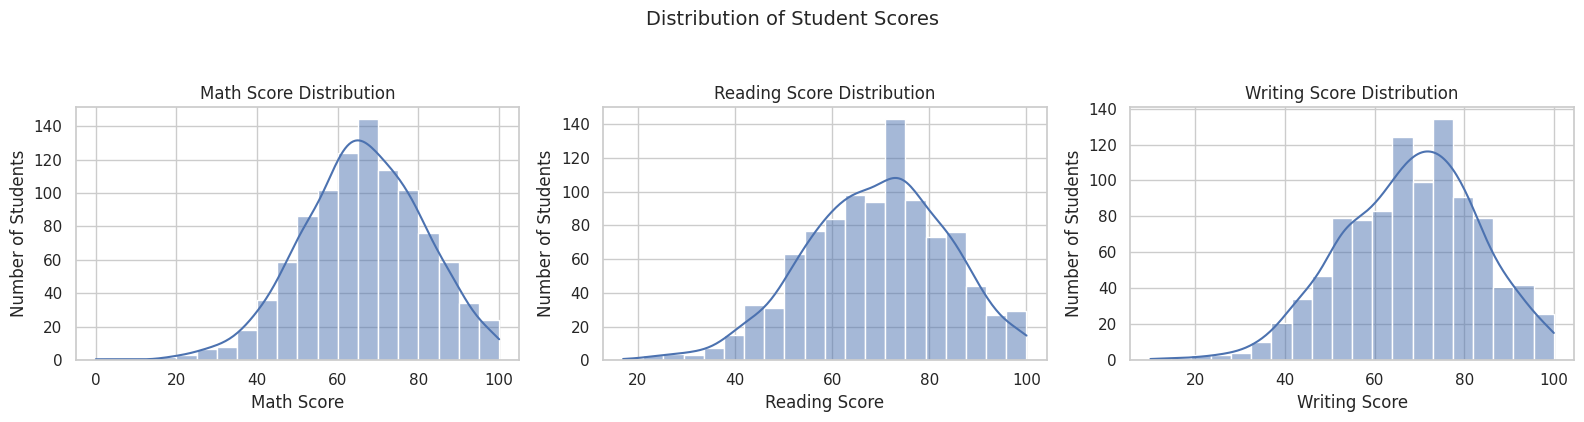

In [ ]:
sns.set(style="whitegrid", context="notebook")

fig, axes = plt.subplots(1, 3, figsize=(16, 4))
for ax, col in zip(axes, ["Math", "Reading", "Writing"]):
    sns.histplot(df[col], kde=True, bins=20, ax=ax)
    ax.set_title(f"{col} Score Distribution")
    ax.set_xlabel(f"{col} Score")
    ax.set_ylabel("Number of Students")

fig.suptitle("Distribution of Student Scores", y=1.05, fontsize=14)
plt.tight_layout()
plt.show()


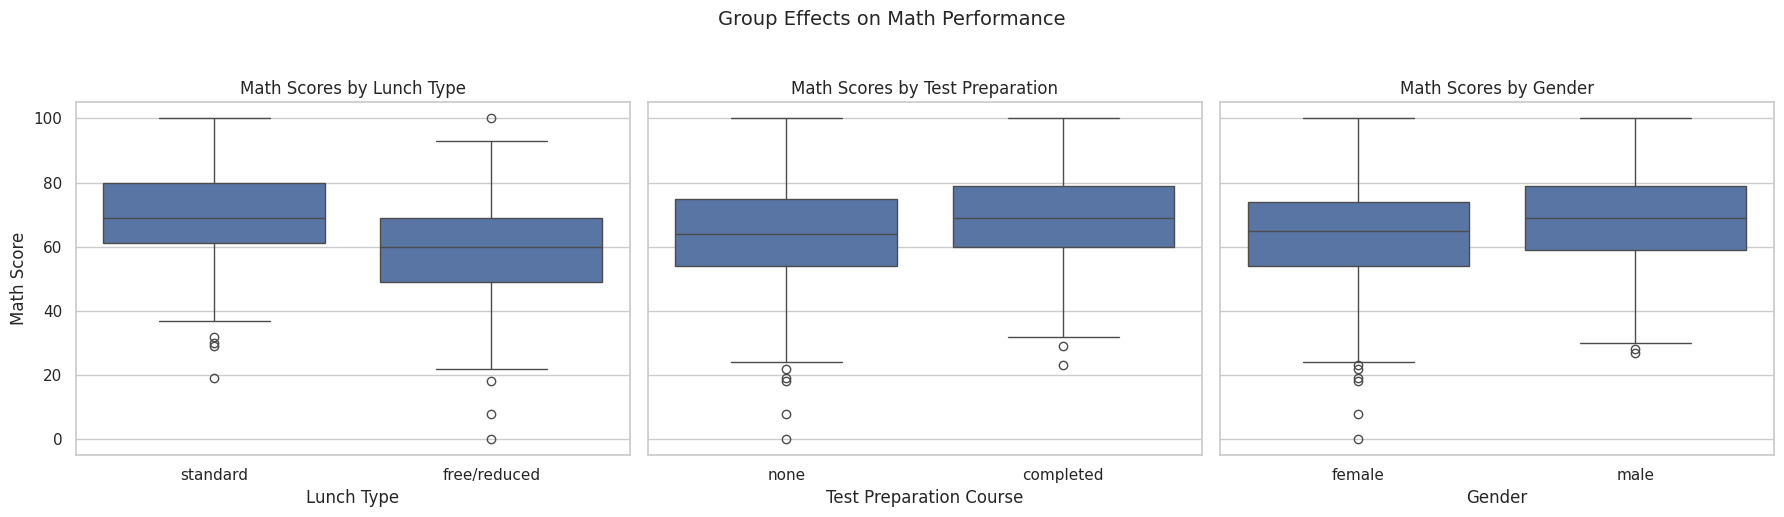

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

sns.boxplot(data=df, x="lunch", y="Math", ax=axes[0])
axes[0].set_title("Math Scores by Lunch Type")
axes[0].set_xlabel("Lunch Type")
axes[0].set_ylabel("Math Score")

sns.boxplot(data=df, x="Prep_Course", y="Math", ax=axes[1])
axes[1].set_title("Math Scores by Test Preparation")
axes[1].set_xlabel("Test Preparation Course")
axes[1].set_ylabel("")

sns.boxplot(data=df, x="gender", y="Math", ax=axes[2])
axes[2].set_title("Math Scores by Gender")
axes[2].set_xlabel("Gender")
axes[2].set_ylabel("")

fig.suptitle("Group Effects on Math Performance", y=1.03, fontsize=14)
plt.tight_layout()
plt.show()

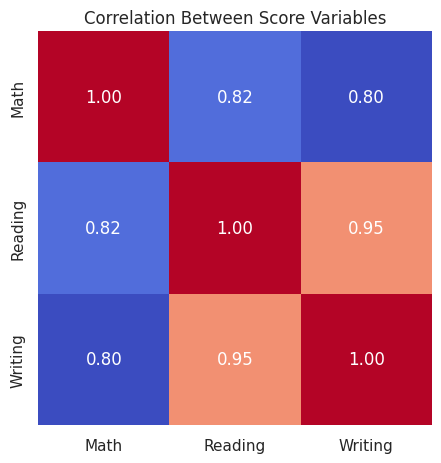

In [ ]:
corr = df[["Math","Reading","Writing"]].corr()
plt.figure(figsize=(4.8, 4.8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=False)
plt.title("Correlation Between Score Variables")
plt.tight_layout()
plt.show()


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('student_performance(in).csv')
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Basic Exploration

- The data consists of 1,000 students, with scores for math, reading, and writing.
- Average scores are: Math ≈ 66, Reading ≈ 69, Writing ≈ 68.
- Standard deviations are around 15, indicating moderate spread.
- Scores range from near zero up to 100.

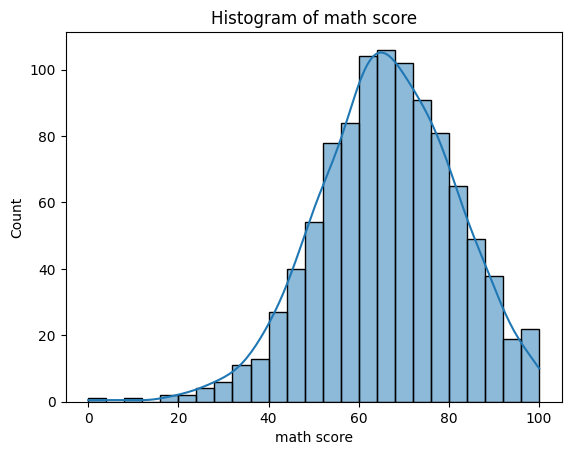

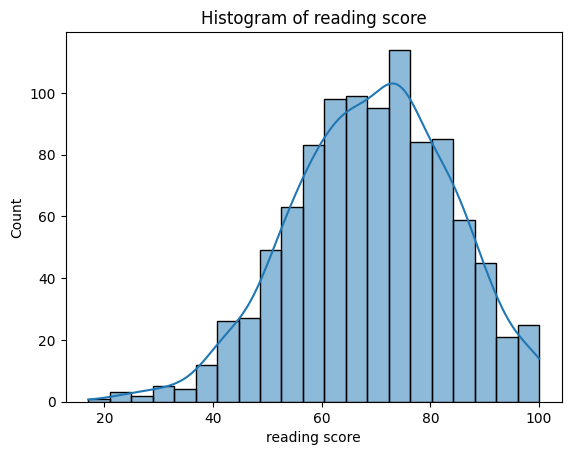

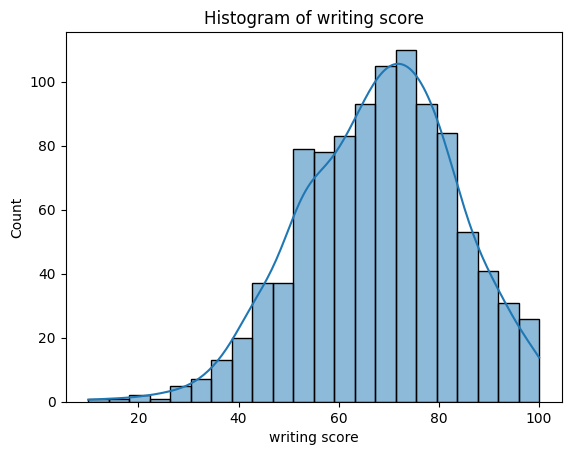

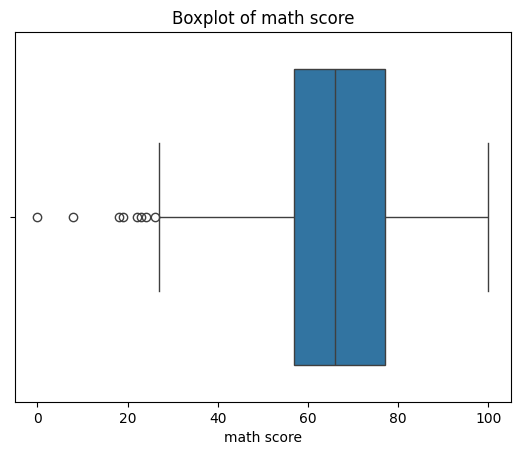

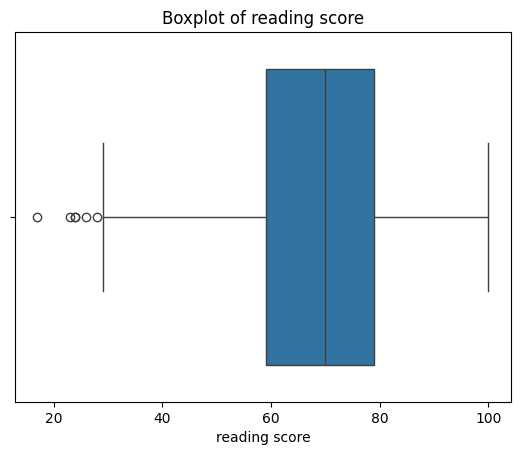

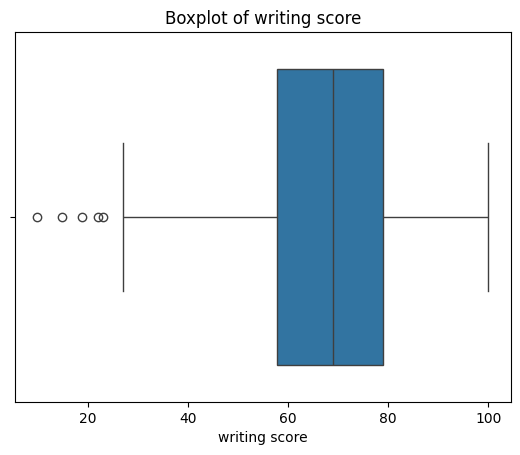

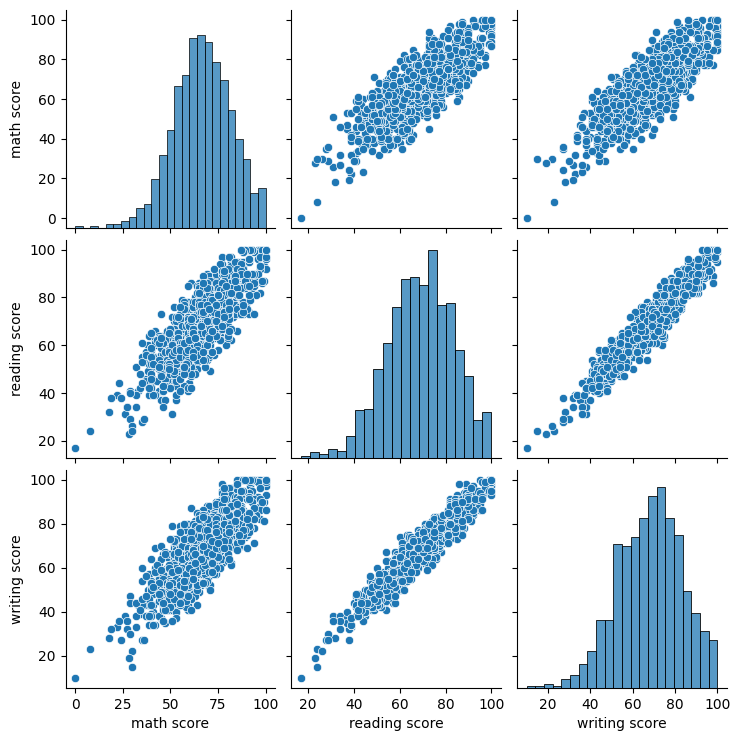

In [4]:
 #Histograms for numerical variables
for col in ['math score','reading score','writing score']:
    plt.figure()
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

# Boxplots to detect outliers
for col in ['math score','reading score','writing score']:
    plt.figure()
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Pairplots to check relationships
sns.pairplot(data[['math score','reading score','writing score']])
plt.show()

#### Visual Analysis

- Histograms show most scores cluster around the mean, with some outliers.
- Boxplots reveal several outliers, especially in math scores, both low and high.
- Pairplots confirm strong positive relationships among all three score types.

Shapiro test p-value = 0.0001454571960658867


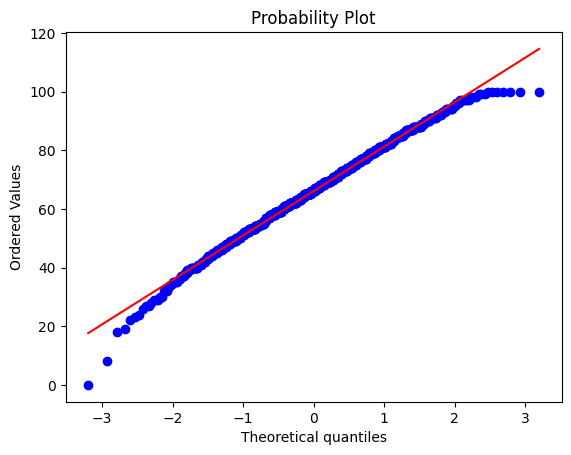

In [5]:
from scipy.stats import shapiro, probplot

stat, p = shapiro(data['math score'])
print(f'Shapiro test p-value = {p}')
probplot(data['math score'], plot=plt)
plt.show()

#### Normality Test

- Shapiro–Wilk test p-value for math score is much less than 0.05, showing the data is **not** perfectly normal.
- The Q–Q plot confirms some deviation from a straight line — non-normal distribution.


In [6]:
from scipy.stats import ttest_ind

t, p = ttest_ind(data[data['gender']=='male']['math score'],
                 data[data['gender']=='female']['math score'])
print(f"T-test p-value = {p}")


T-test p-value = 9.120185549328822e-08


#### Mean Difference (T-Test)

- The p-value for the gender difference in math scores is very small (well below 0.05).
- This indicates a statistically significant difference in average math scores between male and female students.

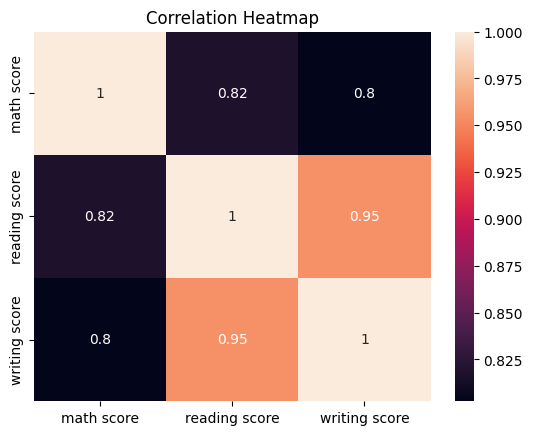

In [8]:
sns.heatmap(data.corr(numeric_only=True), annot=True)
plt.title('Correlation Heatmap')
plt.show()

#### Correlation Analysis

- There is a strong positive correlation between math, reading, and writing scores:
    - Math & Reading: 0.82
    - Math & Writing: 0.80
    - Reading & Writing: 0.95

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

X = data[['reading score', 'writing score']]
y = data['math score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R²: 0.6978433719992597
MSE: 76.08920292579762



#### Regression Model

- The model predicts math scores using reading and writing scores.
- R² ≈ 0.70: The model explains about 70% of the variance in math scores.
- MSE ≈ 76: Indicates the prediction error on the test set.

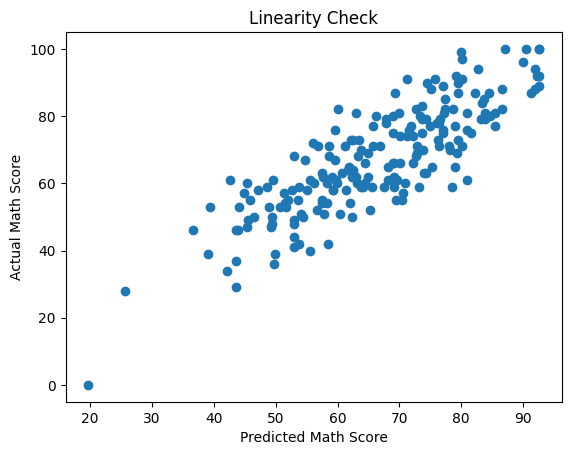

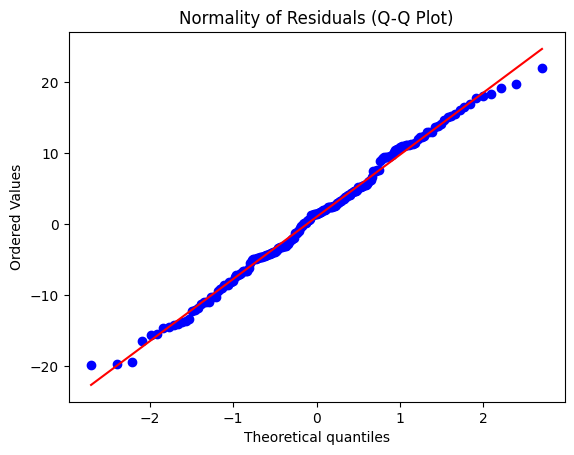

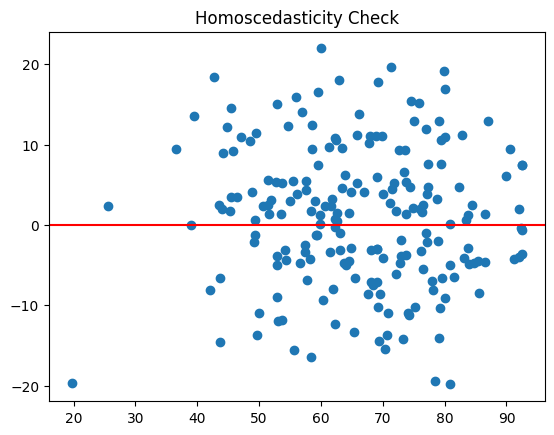

VIFs: [np.float64(11.268556495716725), np.float64(11.268556495716725)]


In [10]:
# Linearity
plt.scatter(y_pred, y_test)
plt.xlabel("Predicted Math Score")
plt.ylabel("Actual Math Score")
plt.title("Linearity Check")
plt.show()

# Normality of Residuals
from scipy.stats import probplot

residuals = y_test - y_pred
probplot(residuals, plot=plt)
plt.title('Normality of Residuals (Q-Q Plot)')
plt.show()

# Homoscedasticity
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r')
plt.title("Homoscedasticity Check")
plt.show()

# Multicollinearity with VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X_vif = sm.add_constant(X)
vif = [variance_inflation_factor(X_vif.values, i+1) for i in range(len(X.columns))]
print("VIFs:", vif)


#### Regression Assumptions

- The scatterplot between predicted and actual math scores is approximately linear.
- Residuals show some deviation from normality.
- There is slight heteroscedasticity, but not prohibitive.
- VIFs for reading and writing scores are high (above 10), suggesting strong multicollinearity. Interpret regression coefficients with caution.


In [11]:
X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()
print(model_sm.summary())


                            OLS Regression Results                            
Dep. Variable:             math score   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1031.
Date:                Thu, 06 Nov 2025   Prob (F-statistic):          2.25e-243
Time:                        21:34:00   Log-Likelihood:                -3576.9
No. Observations:                1000   AIC:                             7160.
Df Residuals:                     997   BIC:                             7175.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.5241      1.328      5.665

#### Regression Coefficients

- Both reading and writing scores are statistically significant predictors (p-values < 0.05).
- Reading score coefficient ≈ 0.60, writing score ≈ 0.25, intercept ≈ 7.52.
- The model is quite accurate and robust for this dataset, but beware of multicollinearity in interpreting individual coefficients.
